# Save ADC from DOOCS to disk

### Imports

In [1]:
import pydoocs
import numpy as np
import time
import matplotlib.pyplot as plt

### Parameters

In [2]:
adc_doocs_address = 'FLASH.FEL/ADC.ADQ.BL1/EXP1.CH00/CH00.DAQ.TD'

train_ID = 0
time_axis = []
adc_trace_average = []

### Utility functions

In [9]:
def wait_for_next_train():
    global train_ID
    while True:
        current_ID = pydoocs.read(adc_doocs_address)['macropulse']
        if train_ID != current_ID:
            train_ID = current_ID
            break
def time_value_matrix_waiting(adc_doocs_address):
    wait_for_next_train()
    adc_dictonary = pydoocs.read(adc_doocs_address)
    time_value_matrix = adc_dictonary['data']
    return time_value_matrix

def record_tof(adc_doocs_address):
    global time_axis, adc_trace_average
    number_of_pulse_trains_to_average = 1
    time_value_matrices = [time_value_matrix_waiting(adc_doocs_address) for each_train in range(number_of_pulse_trains_to_average)]
    adc_traces = [each_matrix[:,1] for each_matrix in time_value_matrices]
    adc_trace_average = np.average(adc_traces, axis=0)
    time_axis = time_value_matrices[0][:, 0]
    np.savez('data/jet_' + str(train_ID) + '.npz', time_axis = time_axis, adc_trace_average = adc_trace_average)
    return time_axis, adc_trace_average



In [11]:
number_of_traces_to_record = 5000

for i in range(number_of_traces_to_record):
    record_tof(adc_doocs_address)
    

### Show last saved ADC trace

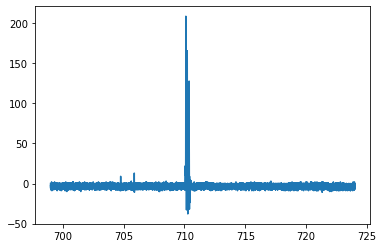

In [5]:
npz_file = np.load('data/' + str(train_ID) + '.npz')
time_axis, adc_trace_average = npz_file['time_axis'], npz_file['adc_trace_average'] 
plt.plot(time_axis, adc_trace_average)